# Copacabana Runs on Buzzard v2.0

This notebook has some of my runs on the Buzzard v2.0 y3 catalog.

## Import Packages

In [1]:
import sys
sys.path.append('/home/s1/jesteves/git/ccopa/python')

from main import copacabana
from make_input_files.make_photoz_pz import generate_photoz_models
from make_input_files.make_input_datasets import read_hdf5_file_to_dict

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})

#### Starting Copa

In [3]:
root = '/data/des61.a/data/johnny/DESY3/projects/buzzardAllHalos/CopacabanaRuns/analysis/'
cfg  = root+'cf_sub.yaml'
copa = copacabana(cfg,dataset='buzzard_v2')

master file: 
 /data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/output/tiles/buzzard_y3_v1.9.8_all_copa_000000.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/output/tiles/buzzard_y3_v1.9.8_all_copa_000001.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/output/tiles/buzzard_y3_v1.9.8_all_copa_000002.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/output/tiles/buzzard_y3_v1.9.8_all_copa_000003.hdf5
outdir: /data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/output/
tile path: /data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/output/tiles


## Prepare Files

Given the hdf5 input files, the function *make_input_file()* returns a master file with all the input file, cluster and members

In [13]:
copa.make_input_file()

Running pre_processing_healpix() instead 

cluster columns
{'R200_true': 'R200', 'DEC': 'DEC', 'RA': 'RA', 'redshift': 'Z_COS', 'tile': 'hpx32', 'M200_true': 'M200', 'HALOID': 'haloid'}
tile : 0
counts: 282
Loading Data
cluster columns
infile: /data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/catalog/y3/buzzard_y3_v1.9.8_all_raw_hpx8_000000.hdf
{'R200_true': 'R200', 'DEC': 'DEC', 'RA': 'RA', 'redshift': 'Z_COS', 'tile': 'hpx32', 'M200_true': 'M200', 'HALOID': 'haloid'}
tile : 3
counts: 227
Loading Data
infile: /data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/catalog/y3/buzzard_y3_v1.9.8_all_raw_hpx8_000003.hdf
cluster columns
{'R200_true': 'R200', 'DEC': 'DEC', 'RA': 'RA', 'redshift': 'Z_COS', 'tile': 'hpx32', 'M200_true': 'M200', 'HALOID': 'haloid'}
tile : 2
counts: 382
cluster columns
{'R200_true': 'R200', 'DEC': 'DEC', 'RA': 'RA', 'redshift': 'Z_COS', 'tile': 'hpx32', 'M200_true': 'M200', 'HALOID': 'haloid'}
tile : 1
counts: 11
Loading Data
infile: /data/des61.a/data/john

/home/s1/jesteves/git/ccopa/python/make_input_files/pre_processing_copa.py:305: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  npoints=npoints) for i in range(len(keys)))
/home/s1/jesteves/git/ccopa/python/make_input_files/pre_processing_copa.py:305: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  npoints=npoints) for i in range(len(keys)))
/home/s1/jesteves/git/ccopa/python/make_input_files/pre_processing_copa.py:305: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  npoints=npoints) for i in range(len(keys)))


Writing Master File
Partial time: 12.39 s 



/home/s1/jesteves/git/ccopa/python/make_input_files/pre_processing_copa.py:305: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  npoints=npoints) for i in range(len(keys)))


Writing Master File
Partial time: 256.20 s 

Writing Master File
Partial time: 309.38 s 

Writing Master File
Partial time: 475.76 s 



In [ ]:
!h5ls /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00033.hdf5

In [ ]:
!h5ls /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00033.hdf5/clusters/main

The members catalog has all the input galaxies with the input columns
``` GID,CID,redshift,RA,DEC,R,z,zerr,zoffset,zwindow,mag,magerr,dmag,pz0,z_true,TRUE, BKG```

In [11]:
!h5ls -d /data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/catalog/y3/buzzard_y3_v1.9.8_all_raw_hpx8_000001.hdf/members/block2_items

block2_items             Dataset {3}
    Data:
        (0) "id", "haloid", "coadd_object_id"


In [ ]:
!h5ls /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00033.hdf5/members/main

## Create Indices Selection

We want to test different magnitude selections.

### 0.2 $L_{\star}$ Buzzard 

The charcteristic magnitude used in Buzzard is not directly provided. They have in DeRose+19 the luminosity functional form. 
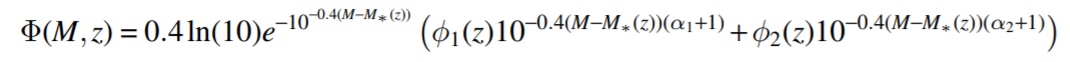

William Black fitted using 5 parameters, his fitted values for m*(z) is in the cell bellow. It's important to mention that 0.2 / 0.4 $L_{\star}$ corresponds to m*(z)+1.75/1.00.

In [8]:
Z1 = [ 2.85703803, 23.35451485]
Z2 = [ -0.13290108,   1.11453393,  -3.74351207,   6.96351527, -10.04310863,  12.60755443,  -7.85820367,   0.92175766]
def char_luminosity(z):
    return np.poly1d(Z1)(np.log(z)) + np.poly1d(Z2)(z)

### Applying Mag Selection for the whole sample

In [32]:
def apply_02Lstar_cut(fname):
    print('loading data: %s'%fname)
    out = read_hdf5_file_to_dict(fname,cols=['redshift','mag'],path='members/main/')
    mag = out['mag'][:,2]  ## i-band
    zcls= out['redshift'][:]
    
    #print('applying mask')
    cut = mag <= char_luminosity(zcls)+1.75
    indices = np.where(cut)[0]
    
    print('writing indices selection: %s \n'%('members/indices/02Lstar'))
    write_indices_out(indices,fname,overwrite=False,col='02Lstar')

In [33]:
def apply_dmag_cut(fname):
    print('loading data: %s'%fname)
    out = read_hdf5_file_to_dict(fname,cols=['redshift','mag', 'dmag'],path='members/main/')
    mag = out['dmag'][:]

    #print('applying mask')
    cut = mag <= 0.
    indices = np.where(cut)[0]
    
    print('writing indices selection: %s \n'%('members/indices/dmag_0'))
    write_indices_out(indices,fname,overwrite=False,col='dmag_0')

In [34]:
def write_indices_out(indices,fname,col='02Lstar',overwrite=False):
    fmaster = h5py.File(fname, 'a')
    if 'indices' not in fmaster['members/'].keys():
        fmaster.create_group('members/indices')

    group = fmaster['members/indices']
    
    try:
        group.create_dataset(col,data=indices)
    except:
        if overwrite:
            del group[col]
            group.create_dataset(col,data=indices)
        else:
            print('Error: indices already exists')
    
    fmaster.close()

In [35]:
for fname in copa.master_fname_tile_list:
    apply_02Lstar_cut(fname)
    apply_dmag_cut(fname)

loading data: /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00000.hdf5
writing indices selection: members/indices/02Lstar 

Error: indices already exists
loading data: /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00000.hdf5
writing indices selection: members/indices/dmag_0 

loading data: /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00016.hdf5
writing indices selection: members/indices/02Lstar 

loading data: /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00016.hdf5
writing indices selection: members/indices/dmag_0 

loading data: /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00017.hdf5
writing indices selection: members/indices/02Lstar 

loading data: /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00017.hdf5
writing indices selection: members/indices/dmag

In [ ]:
## Example

In [5]:
fname = copa.master_fname_tile_list[2]

In [6]:
out = read_hdf5_file_to_dict(fname,cols=['redshift','mag','dmag'],path='members/main/')
mag = out['mag'][:,2]  ## i-band
dmag = out['dmag'][:]
zcls= out['redshift']

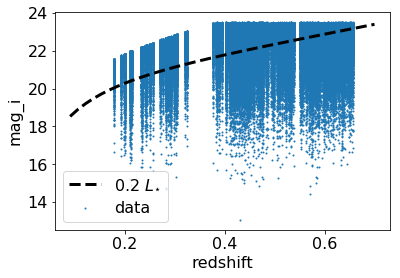

In [9]:
zvec = np.linspace(0.09,0.7,40)
plt.plot(zvec,char_luminosity(zvec)+1.75,'k--',lw=3,label=r'0.2 $L_{\star}$')

plt.scatter(zcls[::50],mag[::50],s=1,label='data')
#plt.scatter(zcls[indices][::50],mag[indices][::50],s=1,label='data')
plt.xlabel('redshift')
plt.ylabel('mag_i')
plt.legend()

In [10]:
cut = mag <= char_luminosity(zcls)+1.75
indices = np.where(cut)[0]

In [ ]:
# out = read_hdf5_file_to_dict(fname,cols=['z_true','z','zerr','mag'],path='members/main/')

In [ ]:
# mask = out['mag'][:,2]>23
# zdnf = out['z'][:]

In [ ]:
out = read_hdf5_file_to_dict(fname,cols=None,path='members/indices/')

## Create Photo-z Catalogs

### Gaussian Photo-z

In [ ]:
generate_photoz_models('gaussian',copa.master_fname_tile_list,0.01,nCores=60)
generate_photoz_models('gaussian',copa.master_fname_tile_list,0.03,nCores=60)
generate_photoz_models('gaussian',copa.master_fname_tile_list,0.05,nCores=60)

Generating photoz catalog: gauss001

Load Infile
infile: /data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/output/tiles/buzzard_y3_v1.9.8_all_copa_000000.hdf5
Error: zmodel file is None
Error: model file is None
Computing pz0
Writing outfile
partial time: 0.73 min


Load Infile
infile: /data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/output/tiles/buzzard_y3_v1.9.8_all_copa_000001.hdf5
Error: zmodel file is None
Error: model file is None
Computing pz0
Writing outfile
partial time: 0.84 min


Load Infile
infile: /data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/output/tiles/buzzard_y3_v1.9.8_all_copa_000002.hdf5
Error: zmodel file is None
Error: model file is None
Computing pz0
Writing outfile
partial time: 2.05 min


Load Infile
infile: /data/des61.a/data/johnny/Buzzard/Buzzard-3_v1.9.8_Y3a/output/tiles/buzzard_y3_v1.9.8_all_copa_000003.hdf5
Error: zmodel file is None
Error: model file is None
Computing pz0


In [4]:
outfile1=root+'aux_files/modelDNF_correction_mag_buzzard.txt'
outfile2=root+'aux_files/modelDNF_correction_z_buzzard.txt'

generate_photoz_models('bias',copa.master_fname_tile_list,0.03,
                       zwindow_file=outfile2,zerror_file=outfile1,
                       group_name='dnf_model',nCores=60)

Generating photoz catalog: dnf_model

Load Infile
infile: /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00017.hdf5
Computing pz0
Writing outfile
partial time: 0.73 min


Load Infile
infile: /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00018.hdf5
Computing pz0
Writing outfile
partial time: 0.94 min


Load Infile
infile: /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00019.hdf5
Computing pz0
Writing outfile
partial time: 1.01 min


Load Infile
infile: /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00020.hdf5
Computing pz0
Writing outfile
partial time: 1.32 min


Load Infile
infile: /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00022.hdf5
Computing pz0
Writing outfile
partial time: 1.34 min


Load Infile
infile: /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00

In [4]:
outfile1=None#root+'aux_files/modelDNF_correction_mag_buzzard.txt'
outfile2=root+'aux_files/modelDNF_correction_z_buzzard.txt'

generate_photoz_models('bias',copa.master_fname_tile_list,0.03,
                       zwindow_file=outfile2,zerror_file=outfile1,
                       group_name='dnf',nCores=60)

Generating photoz catalog: dnf

Load Infile
infile: /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00017.hdf5
Error: model file is None
Computing pz0
Writing outfile
partial time: 0.62 min


Load Infile
infile: /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00018.hdf5
Error: model file is None
Computing pz0
Writing outfile
partial time: 0.83 min


Load Infile
infile: /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00019.hdf5
Error: model file is None
Computing pz0
Writing outfile
partial time: 0.89 min


Load Infile
infile: /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00020.hdf5
Error: model file is None
Computing pz0
Writing outfile
partial time: 1.21 min


Load Infile
infile: /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00022.hdf5
Error: model file is None
Computing pz0
Writing outfile
partial 

In [ ]:
!h5ls /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_golden_00032.hdf5/members/

Beyond the main catalog, we have the different photo-z catalogs used during the code validation.

## Run BMA

In [ ]:
##### Atention: this cell takes more than 6 hours to run. It only needs to be run one time.

# copa.run_bma_healpix(nCores=60,overwrite=False)

In [ ]:
!h5ls /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_golden_00032.hdf5/members/bma

The output are the quantities provided by the BMA Stellar Mass Estimator, https://github.com/apalmese/BMAStellarMasses. The column ``index`` is the indice from the main catalog.